<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/ML/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


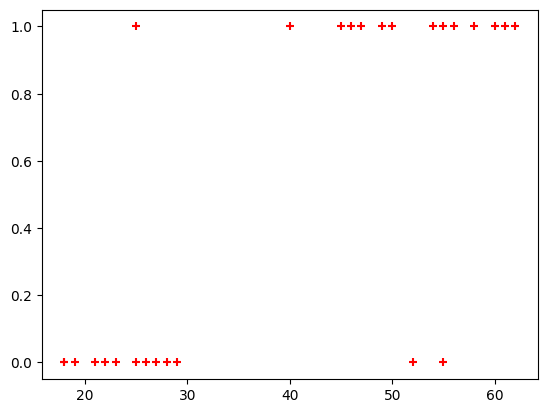

In [25]:
plt.scatter(df.age,df.bought_insurance,color='red',marker='+')

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [28]:
X_test

,age
3,52
19,18
13,29


In [29]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
model.predict(X_test)

array([1, 0, 0])

In [31]:
model.score(X_test,y_test)

0.6666666666666666

In [32]:
model.predict_proba(X_test)

array([[0.07361631, 0.92638369],
       [0.94270257, 0.05729743],
       [0.74557309, 0.25442691]])

In [33]:
model.predict([[43]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [34]:
model.coef_ # value of m in y=m*x+b

array([[0.1568505]])

In [35]:
model.intercept_ # value of b in y=m*x+b

array([-5.62380408])

In [36]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [37]:
def prediction_function(age):
  z = 0.12507101*age - 4.77529797
  y = sigmoid(z)
  return y

In [38]:
age = 35
prediction_function(age)

0.4018379946997246

In [39]:
age = 43
prediction_function(age)

0.6462864587385084

## Exercise

In [40]:
d = pd.read_csv("/content/HR_comma_sep.csv")
d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
left = d[d.left==1]
left.shape

(3571, 10)

In [42]:
retained = d[d.left==0]
retained.shape

(11428, 10)

In [43]:
d.groupby('left').mean()

<ipython-input-43-43107734e5d7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

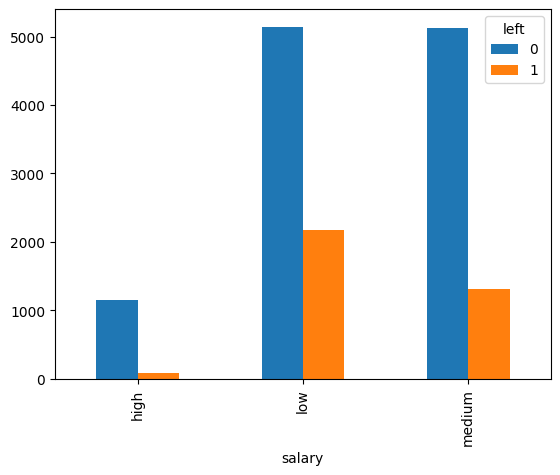

In [44]:
pd.crosstab(d.salary,d.left).plot(kind='bar')

<Axes: xlabel='Department'>

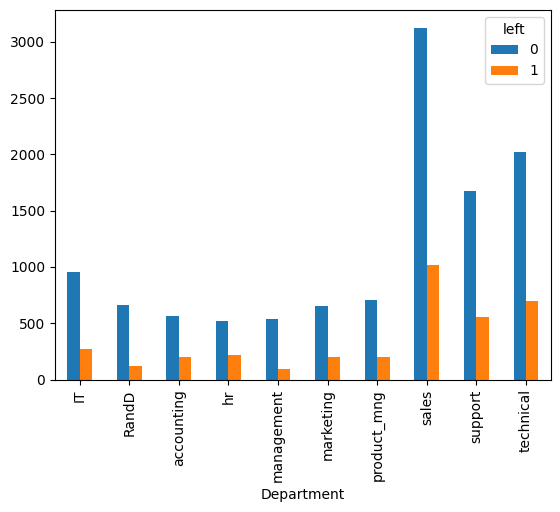

In [45]:
pd.crosstab(d.Department,d.left).plot(kind='bar')

In [46]:
sub_d = d[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sub_d.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [47]:
dummies = pd.get_dummies(sub_d['salary'])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [48]:
merged = pd.concat([sub_d,dummies],axis='columns')
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [49]:
final = merged.drop(['salary','high'],axis='columns')
final

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [50]:
X = final
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [51]:
y = d.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [53]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
model.score(X_test,y_test)

0.7708888888888888

# Multi-Class Classification

In [56]:
from sklearn.datasets import load_digits

In [57]:
digits = load_digits()

In [58]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [59]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

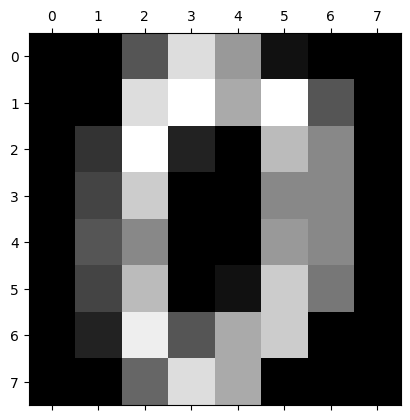

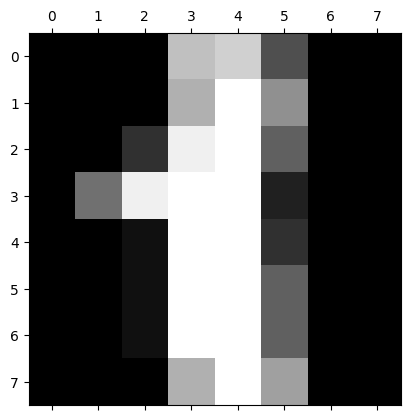

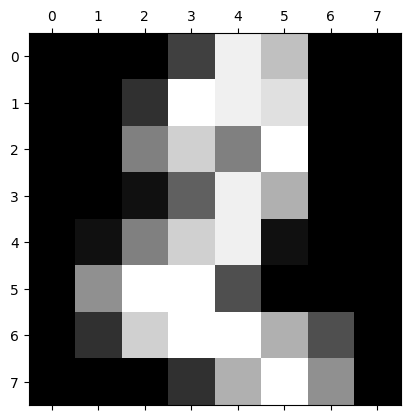

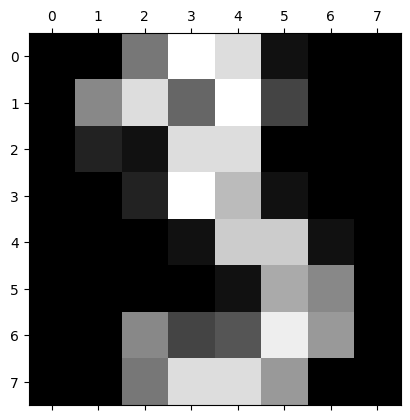

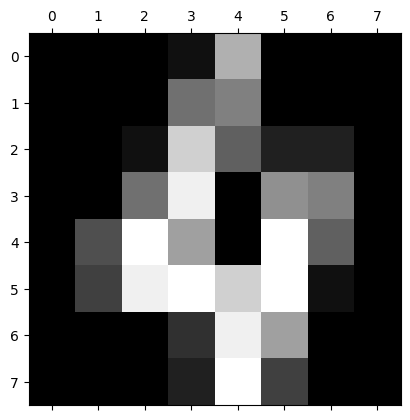

In [60]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [61]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [62]:
X_train , X_test , y_train , y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [63]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
len(X_train)

1437

In [65]:
len(X_test)

360

In [66]:
model.score(X_test,y_test)

0.9666666666666667

In [67]:
digits.target[67]

6

In [68]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [69]:
y_predicted = model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  1,  1],
       [ 0,  0,  1,  0,  0, 24,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 37]])

Text(95.72222222222221, 0.5, 'Predicted')

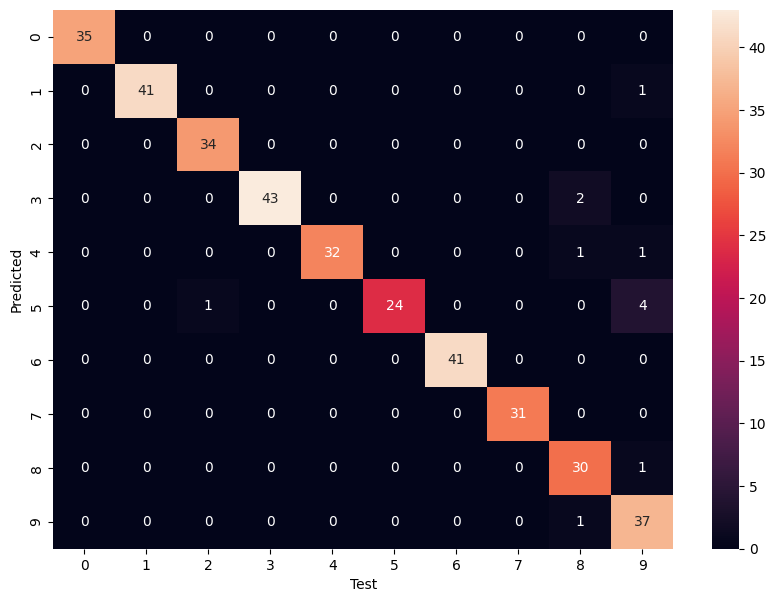

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Test")
plt.ylabel("Predicted")

## Exercise

In [72]:
from sklearn.datasets import load_iris

In [73]:
iris = load_iris()

In [74]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [76]:
X_train , X_test , y_train , y_test = train_test_split(iris.data,iris.target,test_size=0.2)

In [77]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [78]:
model.score(X_test,y_test)

0.9666666666666667

In [81]:
iris.target[5]

0

In [82]:
model.predict(X_test)

array([0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 2, 0])

In [86]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [87]:
model.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])

In [88]:
y_predicted = model.predict(X_test)

In [89]:
conf_matrix = confusion_matrix(y_test,y_predicted)
conf_matrix

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  8]])

Text(8.222222222222223, 0.5, 'Predicted')

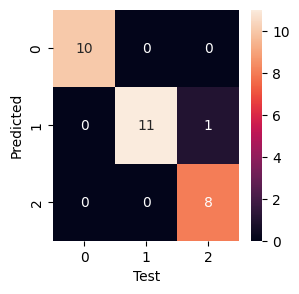

In [90]:
plt.figure(figsize=(3,3))
sn.heatmap(conf_matrix,annot=True)
plt.xlabel("Test")
plt.ylabel("Predicted")

In [92]:
X_test

array([[4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [6.8, 3. , 5.5, 2.1],
       [6.3, 3.4, 5.6, 2.4],
       [5.9, 3. , 4.2, 1.5],
       [4.4, 3. , 1.3, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [5.6, 3. , 4.1, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5.7, 3. , 4.2, 1.2],
       [6.6, 2.9, 4.6, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [5.1, 3.8, 1.9, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [6.3, 2.7, 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [5. , 3. , 1.6, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [7.7, 3. , 6.1, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [5.7, 2.9, 4.2, 1.3],
       [6.4, 3.2, 4.5, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [6.7, 3. , 5. , 1.7],
       [5.1, 3.8, 1.6, 0.2]])

In [93]:
len(X_test)

30